
### В этой главе мы попробуем разобраться с тем:
- для чего нужна нейронная сеть
- общее устройство нейроной сети
- и чем отличается глубокое нейронная сеть от обычной.

Нейронная сеть с самом общем смысле - это ещё один алгоритм машинного обучения. И как и разные алгоритмы машинного обучения, разные типы нейронных сетей могут решать разные задачи. 
С помощью нейронных сетей можно решать, например, задачи:
- регрессии
- классификации (бинарной и мульти)
- понижения разменрости
- кластеризации

Функциональной еденицей нейроной сети явялется нейрон, который принимает на входной сигнал, выполняет ряд математических операций с этим сигналом и отправляет сигнал на выход.

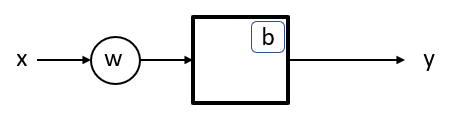

На изображении выше:
 + x - входной сигнла
 + w - вес или коэффициент, на который уманожаеться входной сигнал x
 + b - байес нейрона, который нужен для установки смещения
 + y - выходной сигнал нейрона (результат умножения входного сигнала x на вес w и плюс байес b)

То есть выходной сигнал в данном случаем описываеться зависимостью: y = w * x + b. Это уравнение прямой, что подразумевает линейную зависимость межуд входод x и выхдом y. То есть в самом простом случае, нейроная сеть - это линейная регрессия. Эту нейроную сеть можно записать простой функцией. И через неё выразить простую линейну зависимость. Например, мы знаем, что примерно половина покупателей, заходивших в магазин покупает товар. Нам нужно рассчитать, сколько едениц товара будет продано 19 покупателям. 

In [6]:
# Задаём прараметы модели
w = .5    # Так как, только половина покупателей покупает товар
b = 0     # Никакой дополнительной информации численного характера у нас нет, а значит нет и дополнитльных условий

# Задаём функцию
def n1(x):
    return x * w + b

# Рассчитываем количество купленных едениц товара
result = n1(19)
# Округляем результат до целого числа и выводим на экран
print(int(result))

9


Рассмотрим более сложную зависимость. Случай, когда у нас есть несколько входных сигнало и один выход. Для наглядности возьмём три входных сигнала. Тогда, для каждого входного сигнала нам понадобиться свой весовой коэффициент. Уравнение, выражающее зависимость выхода от входа примет вид y = w1 * x1 + w2 * x2 + w3 * x3 + b.

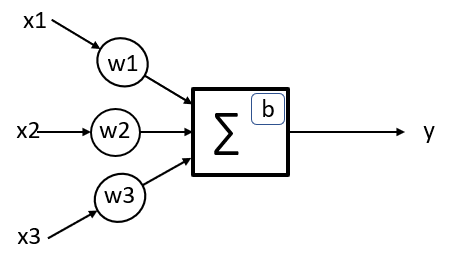

Теперь, имя несколько входов мы можем расширить круг задач, для можем использовать нашу модель для рассчёта более сложных 
зависимостей. Например, у нас есть данные о клиенте банка: наличие работы, наличие текущих кредитов, семья (это входные данные).Если клиент пришёл за новым кредитом, нашай задача определить вероятность того, отдаст ли клиент новый кредит или нет. Наличие работы - это положительный фактор и можно назначить вес этому входу 0.8. Наличие невыплаченных кредитов - отрицательный фактор, поэтому и коэффициент для этого входа будет со знаком минус -0.3. Наличие семьи - положительный фактор; установим коэффициент для этого входа 0.2. Напишем функцию и посмотрим на рассчитаем несколько клиентов.

In [24]:
# импортируем библиотеку для использования функции скалярного произведения векторов
import numpy as np

# Зададим значение весов и байес (пока, что оставим его равным нулю)
w1 = .8
w2 = -.3
w3 = .2
b = 0

# Зададим данные нескольких клиентов, где числа будт соответсвовать входам x1, x2 и x3
client1 = [1, 0, 1]
client2 = [1, 1, 1]
client3 = [1, 0, 0]
client4 = [0, 1, 1]

def n2(client):
    return np.array(client).dot(np.array([w1, w2, w3])) + b

# Рассчитаем вероятность для каждого из четырёх клиентов
print(n2(client1))
print(n2(client2))
print(n2(client3))
print(n2(client4))

1.0
0.7
0.8
-0.09999999999999998


Результаты, предсказуемы: у первого есть работа и семья и нет долгов. Поэтому вероятность возврата кредита высока.
У второго есть и работа и семья и долги, поэтому и вероятность ниже. У третьего нет долгов, но и семьи нет - поэтому он менее надёжен. А четвёртый пока без работы и вероятность воврата вообще отрицательна. С одной стороны это даётпонять, что ему кредит давать точто не стоит, с другой - это абсолютно некоррктно с точки зрения математики. Поскольку на выходе мы хотим видеть вероятность, то давайте и помести все наши выходные значения между 0 и 1. Сделать это можно с помощью сигмоидной функции, которая выражаеться формулой:  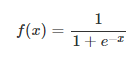
Давайте просто подставим наш выходной сигнла в эту функцию в качестве аргумента. И перещитаем вероятности для каждого клиента.

In [32]:
def n3(client):
    g = np.array(client).dot(np.array([w1, w2, w3])) + b
    return 1 / (1 + np.exp(-g))

print(n3(client1))
print(n3(client2))
print(n3(client3))
print(n3(client4))

0.7310585786300049
0.6681877721681662
0.6899744811276125
0.47502081252106


Теперь наши результаты выглядят более понятно. Давайте посмотрим на то, как сейчас выглядит наш нейрон.

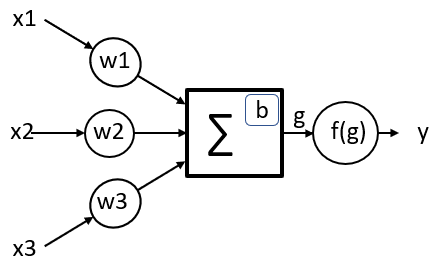

В действительности, функция активации это ключевой элемент нейронных сетей. Функция активации вносит элемент нелинейности в 
нейрон. Это значит, что теперь у нас есть возмжность получить нелинейные зависимости между входом и выходом. А это серьёзно 
расширяет круг задач, которые мы можем решать при помощи нейронных сетей.

.* замечание: использование функций активации не единственный способ добиться нелинейности, но самый популярный.

Теперь, когда есть возможность вносить нелинейность в модель есть смысл строить сети с дополнительными слоями между входом и выходом. Давайте объеденим два нейрона и посмотрим, как считается выходное значение. 

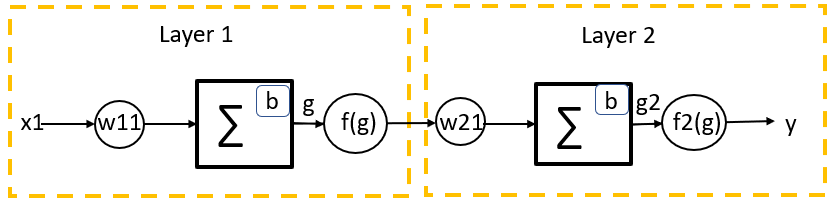

Выход первого слоя, то есть результат функции f(g) попадет на вход второго слоя. А конечный результат y - это результат функции f2(g). То есь, второй слой отличается от первого только новым весом w21 и новым баесом b. Давайте напишем таку сеть.

In [37]:
# Функция описывает работу одного нейрона
def neuron(x, w, b):
    g = x * w + b
    return  1 / (1 + np.exp(-g))

# посчитали результат первого слоя
layer_1 = neuron(client1[0], w=w1, b=0)
#результат первого слоя передали в ту же функцию "neuron", но с новыми параметрами "w" и "b"; в качестве нового веса w21 
#выбрали случайным образом значение 0.7, параметр b оставили без изменений равным нулю
y = neuron(layer_1, w=.7, b=0)

print("Layer_1 = {}. \nLayer_2 = {}".format(layer_1, y))

Layer_1 = 0.6899744811276125. 
Layer_2 = 0.6184518152426012


Предположим, что у нас есть несколько входов. Помимо этого мы хотим создать 1 скрытый слой. Тогда, нейроная сеть буед выглядеть как показано на рисунке ниже.

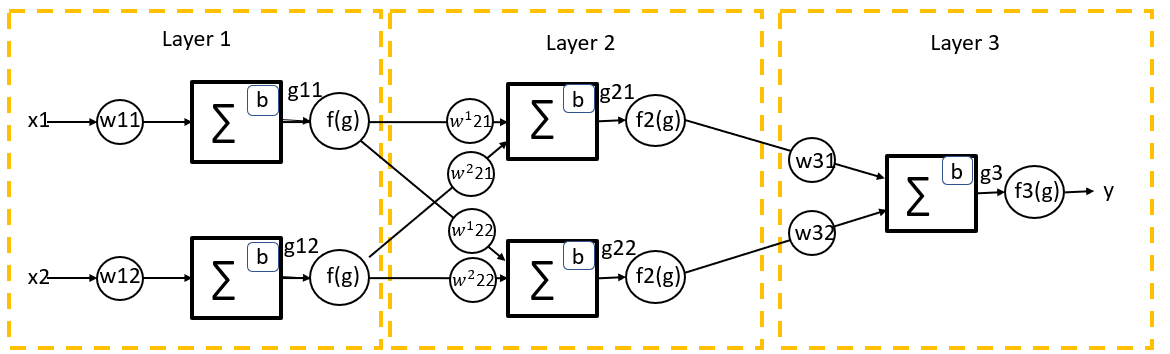

Здесь изображена полносвязная нейроная сеть. Полносвязная, означает, что сигнал от каждого нейрона предыдущего слоя предаётся каждому нейрону следующего слоя. Важное замечание: еслы мы передаём сигнал от одного нейрона к другим нейронам, то мы должны определить весовой коэффициент для каждого передаваемого сигнала к каждому нейрону. В нашем случае, мы передаём сигналы g11  и g12 после функции активации в оба нейроня второго слоя. А значит, для каждого из входящих сигналов в нейронй слоя 2 должен быть свой весовой коэффициент.

Теперь у нашей сети один входной слой, один выходной слой, и один промежуточный, который в нейронных сетях называют скрытым слоем. Это и есть глубокая нейронная сеть. Отличие от обычной нейроной сети в том, что у глубокой нейроной сети есть скрытые слои.